In [132]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
pd.options.display.float_format = '{:.2f}'.format

In [133]:
file = glob("*")
file

['ec2.zip',
 '2019-Nov.csv',
 'con2.zip',
 'ecommerce_1011.zip',
 'ec1.zip',
 'Mid3.ipynb',
 'con1.zip',
 '2019-Oct.csv']

# Nov 파일 줄이기
## df : ec1

In [3]:
ec = pd.read_csv('2019-Nov.csv', chunksize = 675020)
ec_lst = list(ec)
ec_lst

[                     event_time event_type  product_id          category_id  \
 0       2019-11-01 00:00:00 UTC       view     1003461  2053013555631882655   
 1       2019-11-01 00:00:00 UTC       view     5000088  2053013566100866035   
 2       2019-11-01 00:00:01 UTC       view    17302664  2053013553853497655   
 3       2019-11-01 00:00:01 UTC       view     3601530  2053013563810775923   
 4       2019-11-01 00:00:01 UTC       view     1004775  2053013555631882655   
 ...                         ...        ...         ...                  ...   
 675015  2019-11-01 11:38:19 UTC       view     1002544  2053013555631882655   
 675016  2019-11-01 11:38:19 UTC       view     1004258  2053013555631882655   
 675017  2019-11-01 11:38:19 UTC       view     1005100  2053013555631882655   
 675018  2019-11-01 11:38:19 UTC       view     1004340  2053013555631882655   
 675019  2019-11-01 11:38:19 UTC       view    56300004  2166064855264526831   
 
                     category_code    

In [4]:
len(ec_lst)

100

In [5]:
lst = []
for i in ec_lst :
    i = i.drop(columns = ["user_session", "category_id"])
    i = i.dropna()
    for col in i.columns:
        dtype_name = i[col].dtypes.name
        if dtype_name.startswith("int"):
            i[col] = pd.to_numeric(i[col], downcast = "unsigned")
        elif dtype_name.startswith("float"):
            i[col] = pd.to_numeric(i[col], downcast = "unsigned")
    lst.append(i)

In [6]:
len(lst)

100

In [8]:
con1 = pd.concat(lst[:50])
con1 = con1.loc[con1["category_code"].str.contains("electronics|computers"), :]
con1["category_code"] = [i.split(".")[-1] for i in con1["category_code"] ]
con1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13975592 entries, 0 to 33750998
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     uint32 
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        uint32 
dtypes: float32(1), object(4), uint32(2)
memory usage: 693.1+ MB


In [9]:
con2 = pd.concat(lst[50:])
con2 = con2.loc[con2["category_code"].str.contains("electronics|computers"), :]
con2["category_code"] = [i.split(".")[-1] for i in con2["category_code"] ]
con2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13648362 entries, 33751001 to 67501978
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     uint32 
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        uint32 
dtypes: float32(1), object(4), uint32(2)
memory usage: 676.8+ MB


In [10]:
ec1 = pd.concat([con1,con2],ignore_index = True)

In [11]:
ec1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27623954 entries, 0 to 27623953
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     uint32 
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        uint32 
dtypes: float32(1), object(4), uint32(2)
memory usage: 1.1+ GB


In [12]:
ec1_path = "ec1.zip"

# file_path_csv = file_name
ec1.to_parquet(ec1_path, compression = "gzip")


In [13]:
a = pd.read_parquet("ec1.zip")
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27623954 entries, 0 to 27623953
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        int64  
dtypes: float32(1), int64(2), object(4)
memory usage: 1.3+ GB


# Oct 파일 줄이기
## df : ec2

In [93]:
ece = pd.read_csv('2019-Oct.csv', chunksize = 675020)
ece_lst = list(ece)
ece_lst

[                     event_time event_type  product_id          category_id  \
 0       2019-10-01 00:00:00 UTC       view    44600062  2103807459595387724   
 1       2019-10-01 00:00:00 UTC       view     3900821  2053013552326770905   
 2       2019-10-01 00:00:01 UTC       view    17200506  2053013559792632471   
 3       2019-10-01 00:00:01 UTC       view     1307067  2053013558920217191   
 4       2019-10-01 00:00:04 UTC       view     1004237  2053013555631882655   
 ...                         ...        ...         ...                  ...   
 675015  2019-10-01 13:06:35 UTC       view    26403368  2053013563651392361   
 675016  2019-10-01 13:06:35 UTC       view     5801170  2053013553945772349   
 675017  2019-10-01 13:06:35 UTC       view     1004653  2053013555631882655   
 675018  2019-10-01 13:06:35 UTC       view    21403866  2053013561579406073   
 675019  2019-10-01 13:06:35 UTC       view     3900440  2053013552326770905   
 
                               categor

In [94]:
lst1 = []
for i in ece_lst :
    i = i.drop(columns = ["user_session", "category_id"])
    i = i.dropna()
    for col in i.columns:
        dtype_name = i[col].dtypes.name
        if dtype_name.startswith("int"):
            i[col] = pd.to_numeric(i[col], downcast = "unsigned")
        elif dtype_name.startswith("float"):
            i[col] = pd.to_numeric(i[col], downcast = "float")
    lst1.append(i)

In [95]:
con3 = pd.concat(lst1[:50])
con3 = con3.loc[con3["category_code"].str.contains("electronics|computers"), :]
con3["category_code"] = [i.split(".")[-1] for i in con3["category_code"] ]
con3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14382302 entries, 3 to 33750999
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     uint32 
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        uint32 
dtypes: float32(1), object(4), uint32(2)
memory usage: 713.2+ MB


In [96]:
con4 = pd.concat(lst1[50:])
con4 = con4.loc[con4["category_code"].str.contains("electronics|computers"), :]
con4["category_code"] = [i.split(".")[-1] for i in con4["category_code"] ]
con4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3710724 entries, 33751000 to 42448762
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     uint32 
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        uint32 
dtypes: float32(1), object(4), uint32(2)
memory usage: 184.0+ MB


In [97]:
ec2 = pd.concat([con3,con4],ignore_index = True)

In [98]:
ec2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18093026 entries, 0 to 18093025
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     uint32 
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        uint32 
dtypes: float32(1), object(4), uint32(2)
memory usage: 759.2+ MB


In [99]:
ec2_path = "ec2.zip"

# file_path_csv = file_name
ec2.to_parquet(ec2_path, compression = "gzip")


In [100]:
b = pd.read_parquet("ec2.zip")
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18093026 entries, 0 to 18093025
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        int64  
dtypes: float32(1), int64(2), object(4)
memory usage: 897.3+ MB


In [34]:
# 파일 사이즈 bytes 로 표기하기
def convert_bytes(num):
    """
    1024 보다 크면 숫자를 나누고 아니면 숫자와 단위를 표시하도록
    for문을 돌면서 값을 1024로 나누고 
    값이 1024 보다 작다면 단위와 함께 num 을 반횐
    """
    for fs in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024 : 
            return(f"{num:.0f} {fs}")
        num /=1024


def file_size(file_path):
    """
    파일이 있다면 convert_bytes 함수를 통해 크기를 구함
    """
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)


file_size(ec1_path), file_size(ec2_path), file_size("2019-Oct.csv")

('202 MB', '202 MB', '5 GB')

In [101]:
a = pd.read_parquet("ec1.zip")
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27623954 entries, 0 to 27623953
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        int64  
dtypes: float32(1), int64(2), object(4)
memory usage: 1.3+ GB


In [102]:
b = pd.read_parquet("ec2.zip")
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18093026 entries, 0 to 18093025
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_code  object 
 4   brand          object 
 5   price          float32
 6   user_id        int64  
dtypes: float32(1), int64(2), object(4)
memory usage: 897.3+ MB


# 10,11월 데이터 합친 전체 데이터프레임
## df
- "ecommerce_1011.csv"로 저장

In [103]:
df = pd.concat([a,b], ignore_index = True)
df

,event_time,event_type,product_id,category_code,brand,price,user_id
0,2019-11-01 00:00:00 UTC,view,1003461,smartphone,xiaomi,489.07,520088904
1,2019-11-01 00:00:01 UTC,view,1004775,smartphone,xiaomi,183.27,558856683
2,2019-11-01 00:00:01 UTC,view,1306894,notebook,hp,360.09,520772685
3,2019-11-01 00:00:01 UTC,view,1306421,notebook,hp,514.56,514028527
4,2019-11-01 00:00:02 UTC,view,1004258,smartphone,apple,732.07,532647354
...,...,...,...,...,...,...,...
45716975,2019-10-31 23:59:56 UTC,view,1005008,smartphone,xiaomi,94.46,557202408
45716976,2019-10-31 23:59:56 UTC,view,1003936,smartphone,xiaomi,437.33,520088904
45716977,2019-10-31 23:59:58 UTC,view,1004870,smartphone,samsung,275.25,518956209
45716978,2019-10-31 23:59:58 UTC,view,2300275,video,gopro,527.40,537931532


In [104]:
df["event_time"] = pd.to_datetime(df["event_time"])

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716980 entries, 0 to 45716979
Data columns (total 7 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_code  object             
 4   brand          object             
 5   price          float32            
 6   user_id        int64              
dtypes: datetime64[ns, UTC](1), float32(1), int64(2), object(3)
memory usage: 2.2+ GB


In [106]:
# 전체 파일 저장
df.to_parquet("ecommerce_1011.zip", compression = "gzip")

In [107]:
df_t = pd.read_parquet("ecommerce_1011.zip")

In [108]:
df_t

,event_time,event_type,product_id,category_code,brand,price,user_id
0,2019-11-01 00:00:00+00:00,view,1003461,smartphone,xiaomi,489.07,520088904
1,2019-11-01 00:00:01+00:00,view,1004775,smartphone,xiaomi,183.27,558856683
2,2019-11-01 00:00:01+00:00,view,1306894,notebook,hp,360.09,520772685
3,2019-11-01 00:00:01+00:00,view,1306421,notebook,hp,514.56,514028527
4,2019-11-01 00:00:02+00:00,view,1004258,smartphone,apple,732.07,532647354
...,...,...,...,...,...,...,...
45716975,2019-10-31 23:59:56+00:00,view,1005008,smartphone,xiaomi,94.46,557202408
45716976,2019-10-31 23:59:56+00:00,view,1003936,smartphone,xiaomi,437.33,520088904
45716977,2019-10-31 23:59:58+00:00,view,1004870,smartphone,samsung,275.25,518956209
45716978,2019-10-31 23:59:58+00:00,view,2300275,video,gopro,527.40,537931532


In [49]:
df_t.describe()

,product_id,price,user_id
count,55247908.00,55247908.00,55247908.00
mean,3677363.44,344.82,540082646.27
std,10560241.43,401.60,23099915.42
min,1000365.00,0.77,29515875.00
25%,1004838.00,154.42,516831840.00
50%,1005161.00,279.18,537925364.00
75%,1801818.00,638.34,563749444.00
max,100028221.00,2574.07,579969851.00


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716980 entries, 0 to 45716979
Data columns (total 7 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_code  object             
 4   brand          object             
 5   price          float32            
 6   user_id        int64              
dtypes: datetime64[ns, UTC](1), float32(1), int64(2), object(3)
memory usage: 2.2+ GB


In [80]:
df_t.sort_values(by= "price", ascending = False).head(50)

,event_time,event_type,product_id,category_code,brand,price,user_id
12627749,2019-11-15 13:37:41+00:00,view,21407288,clocks,rado,2574.07,512424608
52414765,2019-11-27 08:26:44+00:00,view,21407288,clocks,rado,2574.07,568796882
36027299,2019-11-12 12:52:30+00:00,view,21407287,clocks,rado,2574.07,526785640
45476293,2019-11-17 15:15:45+00:00,view,21407288,clocks,rado,2574.07,541680508
45476027,2019-11-17 15:15:39+00:00,view,21407288,clocks,rado,2574.07,541680508
43399563,2019-11-16 18:45:50+00:00,view,21407287,clocks,rado,2574.07,519233798
36027552,2019-11-12 12:52:48+00:00,view,21407287,clocks,rado,2574.07,526785640
45475609,2019-11-17 15:15:30+00:00,view,21407287,clocks,rado,2574.07,541680508
45474766,2019-11-17 15:15:13+00:00,view,21407287,clocks,rado,2574.07,541680508
25231922,2019-11-27 19:00:05+00:00,view,21407288,clocks,rado,2574.07,531226037


In [110]:
df_t.loc[df_t["price"] > 2500, :].sort_values(by = "price", ascending = False).value_counts("event_type")

event_type
view        133390
cart          1186
purchase       394
dtype: int64

<AxesSubplot:>

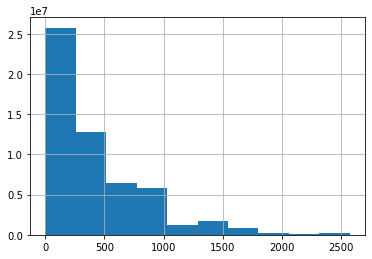

In [52]:
# 히스토그램으로 분포를 보니 2000이상은 극히 적어 이상치로 제거한다
df_t["price"].hist()

In [111]:
df_valid = df_t[df_t["user_id"].notnull()
               & df_t["user_id"].notnull()]

In [112]:
df_valid.isnull().sum()

event_time       0
event_type       0
product_id       0
category_code    0
brand            0
price            0
user_id          0
dtype: int64

In [85]:
# 중복 데이터 중 첫번째 것만(keep='first') 봅니다.
# keep은 중복 데이터 발견시에 어떤 데이터를 유지하고 제외할지 결정해주는 변수입니다. ('first', 'last','False'로 선택적 입력 가능)
# 설문조사 등에서 처음 데이터를 남길지 마지막 데이터를 사용할지 결정할 때 사용하기도 합니다.
df_valid[df_valid.duplicated(keep=False)].sort_values(["user_id", "category_code", "brand"])

,event_time,event_type,product_id,category_code,brand,price,user_id
8114377,2019-11-12 06:03:52+00:00,view,1801638,tv,harper,153.67,29515875
8114647,2019-11-12 06:04:14+00:00,view,1801638,tv,harper,153.67,29515875
8115046,2019-11-12 06:04:48+00:00,view,1801638,tv,harper,153.67,29515875
35738331,2019-11-12 06:03:52+00:00,view,1801638,tv,harper,153.67,29515875
35738601,2019-11-12 06:04:14+00:00,view,1801638,tv,harper,153.67,29515875
...,...,...,...,...,...,...,...
55247856,2019-11-30 23:59:01+00:00,view,1003571,smartphone,xiaomi,250.87,579969570
27623928,2019-11-30 23:59:40+00:00,view,4804718,headphone,apple,329.14,579969767
55247882,2019-11-30 23:59:40+00:00,view,4804718,headphone,apple,329.14,579969767
27623953,2019-11-30 23:59:59+00:00,view,1004233,smartphone,apple,1312.52,579969851


In [86]:
c

,event_time,event_type,product_id,category_code,brand,price,user_id
0,2019-11-01 00:00:00+00:00,view,1003461,smartphone,xiaomi,489.07,520088904
1,2019-11-01 00:00:01+00:00,view,1004775,smartphone,xiaomi,183.27,558856683
2,2019-11-01 00:00:01+00:00,view,1306894,notebook,hp,360.09,520772685
3,2019-11-01 00:00:01+00:00,view,1306421,notebook,hp,514.56,514028527
4,2019-11-01 00:00:02+00:00,view,1004258,smartphone,apple,732.07,532647354
...,...,...,...,...,...,...,...
27623949,2019-11-30 23:59:54+00:00,view,1005118,smartphone,apple,925.47,579969045
27623950,2019-11-30 23:59:55+00:00,view,1500447,printer,hp,136.14,525386563
27623951,2019-11-30 23:59:57+00:00,view,8800713,telephone,prestigio,8.37,579968742
27623952,2019-11-30 23:59:59+00:00,view,1004833,smartphone,samsung,167.03,557794415


In [87]:
def find_recency(x) :
    """ 최근 마지막 거래일과 해당 고객의 마지막 거래일의 차이를 구합니다."""
    # Recency 계산을 위해 해당 주문에서 가장 최근 구매가 일어난 시간을 가져옵니다.
    # 최근 거래 기준일(last_timestamp)을 만들기 위해 timedelta로 날짜를 더해줍니다.(최소값:1 설정) 
    last_timestamp = df_n["event_time"].max() + dt.timedelta(days=1)
    return (last_timestamp - x.max()).days

find_recency(df_n["event_time"][:1000])

30

In [88]:
# RFM 값을 정의합니다.
# Recency : 최근 거래 기준일(last_timestamp)과 고객별 최근 구매한 날짜(x.max())와 차이값
# Frequency : 구매 빈도수
# Monetary : 총 구매 금액
last_timestamp = df_n["event_time"].max() + dt.timedelta(days=1)
rfm = df_n.groupby("user_id").agg({"event_time" : lambda x :(last_timestamp - x.max()).days,
                                    "product_id" : "count", 
                                    "price" : "sum"})
rfm

,event_time,product_id,price
user_id,,,
29515875,19,5,691.09
31198833,18,18,5780.68
41798457,5,1,945.97
74383042,12,11,1280.58
88309646,20,1,123.07
...,...,...,...
579969525,1,1,591.75
579969533,1,1,152.72
579969570,1,3,752.61


In [89]:
rfm.columns = ["Recency", "Frequency", "MonetaryValue"]
rfm

,Recency,Frequency,MonetaryValue
user_id,,,
29515875,19,5,691.09
31198833,18,18,5780.68
41798457,5,1,945.97
74383042,12,11,1280.58
88309646,20,1,123.07
...,...,...,...
579969525,1,1,591.75
579969533,1,1,152.72
579969570,1,3,752.61


In [92]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199457 entries, 29515875 to 579969851
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Recency        int64  
 1   Frequency      int64  
 2   MonetaryValue  float32
dtypes: float32(1), int64(2)
memory usage: 58.7 MB


array([[<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'Frequency'}>],
       [<AxesSubplot:title={'center':'MonetaryValue'}>, <AxesSubplot:>]],
      dtype=object)

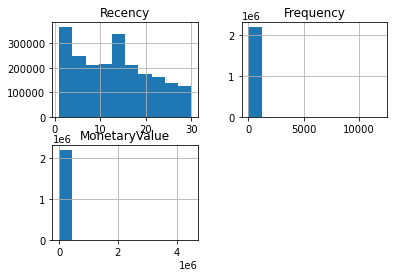

In [65]:
rfm.hist()

In [120]:
# Recency 는 최근일수록 높은 스코어를 갖도록 합니다.
# Frequency, MonetaryValue 는 값이 클 수록 높은 스코어를 갖도록 합니다.
r_labels = list(range(4,0,-1))
f_labels = list(range(1,5))
m_labels = list(range(1,5))
cut_size = 4

In [121]:
# 컷 사이즈를 5로 했더니 구간 사이값들이 있어 구간이 나눠지지 않았다. 
# 공부결과 5개이상의 구간분류는 지양한다고 하여 4개로 점수를 구했다.
r_cut  = pd.qcut(rfm["Recency"], cut_size, labels=r_labels)
f_cut  = pd.qcut(rfm["Frequency"], cut_size, labels=f_labels)
m_cut  = pd.qcut(rfm["MonetaryValue"], cut_size, labels=m_labels)

In [122]:
rfm

,Recency,Frequency,MonetaryValue
user_id,,,
29515875,19,5,691.09
31198833,18,18,5780.68
41798457,5,1,945.97
74383042,12,11,1280.58
88309646,20,1,123.07
...,...,...,...
579969525,1,1,591.75
579969533,1,1,152.72
579969570,1,3,752.61


### RFM Segment

In [124]:
# assign 을 사용하면 여러 변수를 한 번에 만들 수 있습니다.
rfm = rfm.assign(R = r_cut, F = f_cut, M = m_cut)
rfm

,Recency,Frequency,MonetaryValue,R,F,M
user_id,,,,,,
29515875,19,5,691.09,2,3,2
31198833,18,18,5780.68,2,4,4
41798457,5,1,945.97,4,1,2
74383042,12,11,1280.58,3,3,2
88309646,20,1,123.07,1,1,1
...,...,...,...,...,...,...
579969525,1,1,591.75,4,1,2
579969533,1,1,152.72,4,1,1
579969570,1,3,752.61,4,2,2


In [139]:
# RFM_segment 값을 구합니다. 
# R, F, M 값을 문자 그대로 붙여서 세그먼트를 구분합니다.
rfm["RFM_segment"]= rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
29515875,19,5,691.09,2,3,2,232,7
31198833,18,18,5780.68,2,4,4,244,10
41798457,5,1,945.97,4,1,2,412,7
74383042,12,11,1280.58,3,3,2,332,8
88309646,20,1,123.07,1,1,1,111,3
...,...,...,...,...,...,...,...,...
579969525,1,1,591.75,4,1,2,412,7
579969533,1,1,152.72,4,1,1,411,6
579969570,1,3,752.61,4,2,2,422,8


### RFM Score

In [140]:
# R, F, M 값의 합계를 구해서 세그먼트 점수를 구합니다.
rfm["RFM_score"] = rfm[["R", "F", "M"]].sum(axis=1).astype(int)
rfm.head(2)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score
user_id,,,,,,,,
29515875,19,5,691.09,2,3,2,232,7
31198833,18,18,5780.68,2,4,4,244,10


<AxesSubplot:xlabel='RFM_segment', ylabel='RFM_score'>

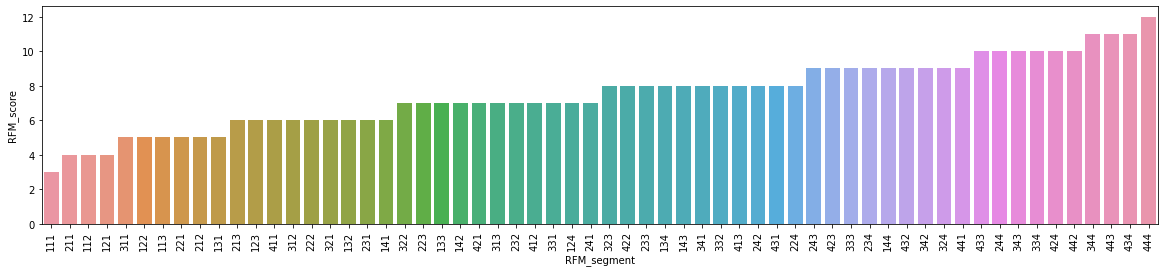

In [141]:
# RFM segment 값에 따라 정렬합니다.
plt.figure(figsize=(20, 4))
plt.xticks(rotation=90)
sns.barplot(data=rfm.sort_values("RFM_score"), x="RFM_segment", y= "RFM_score")

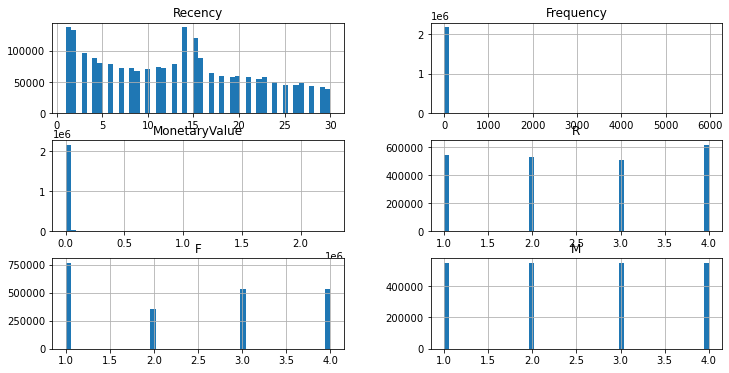

In [142]:
rfm.iloc[:, :-2].astype(float).hist(figsize = (12,6), bins = 50);

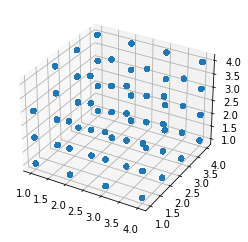

In [143]:
# 3d projection ax.scatter3D rfm["R"], rfm["F"], rfm["M"]
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["R"], rfm["F"], rfm["M"])

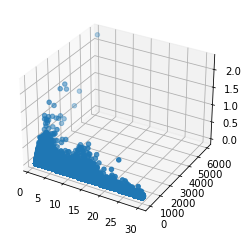

In [144]:
# rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"]
ax = plt.axes(projection='3d')
ax.scatter3D(rfm["Recency"], rfm["Frequency"], rfm["MonetaryValue"])

In [154]:
# 문자열의 format 함수를 사용하여 소수점 아래는 표기하지 않도록({:,.0f}) 문자열 포맷을 지정합니다.
rfm_r = rfm.groupby("RFM_score").agg({"Recency" : "mean", "Frequency" : "mean", "MonetaryValue" : ["mean", "sum"]})
rfm_r.style.background_gradient(cmap = "BuPu").format("{:,.0f}")

### qcut을 통한 고객군 나누기

In [155]:
# qcut 을 통해 3단계로 "silver", "gold", "platinum" 고객군을 나눕니다. 
rfm["RFM_class"] = pd.qcut(rfm["RFM_score"], 4, labels = ["bronze", "silver", "gold", "platinum"] )
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
29515875,19,5,691.09,2,3,2,232,7,silver
31198833,18,18,5780.68,2,4,4,244,10,gold
41798457,5,1,945.97,4,1,2,412,7,silver
74383042,12,11,1280.58,3,3,2,332,8,gold
88309646,20,1,123.07,1,1,1,111,3,bronze
...,...,...,...,...,...,...,...,...,...
579969525,1,1,591.75,4,1,2,412,7,silver
579969533,1,1,152.72,4,1,1,411,6,silver
579969570,1,3,752.61,4,2,2,422,8,gold


In [156]:
# "RFM_class" 별로 그룹화 하고 "RFM_score" 의 describe 값을 구합니다.
rfm.groupby("RFM_class")["RFM_score"].describe()

,count,mean,std,min,25%,50%,75%,max
RFM_class,,,,,,,,
bronze,605622.00,4.13,0.81,3.00,3.00,4.00,5.00,5.00
silver,547415.00,6.45,0.50,6.00,6.00,6.00,7.00,7.00
gold,698272.00,9.01,0.82,8.00,8.00,9.00,10.00,10.00
platinum,348148.00,11.50,0.50,11.00,11.00,11.50,12.00,12.00


<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

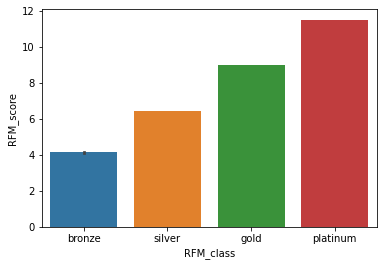

In [158]:
# barplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.barplot(data=rfm, x="RFM_class", y="RFM_score")

<AxesSubplot:xlabel='RFM_class', ylabel='RFM_score'>

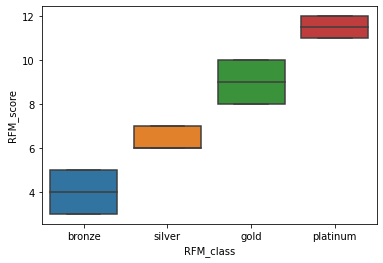

In [159]:
# boxplot으로 RFM_class 별 평균 RFM_score 나타냅니다.
sns.boxplot(data=rfm, x="RFM_class", y="RFM_score")

In [160]:
# "RFM_class" 별로 그룹화합니다.
# "Recency", "Frequency" 의 평균을 구합니다.
# "MonetaryValue"의 "mean", "sum", "count" 값을 구합니다.
rfm_class_agg = rfm.groupby("RFM_class").agg({"Recency": "mean", 
                              "Frequency": "mean",
                             "MonetaryValue": ["mean", "sum", "count"]})
# 위에서 구한 값을 .style.background_gradient() 통해서 시각화합니다.
rfm_class_agg.style.background_gradient(cmap="Oranges").format("{:,.0f}")

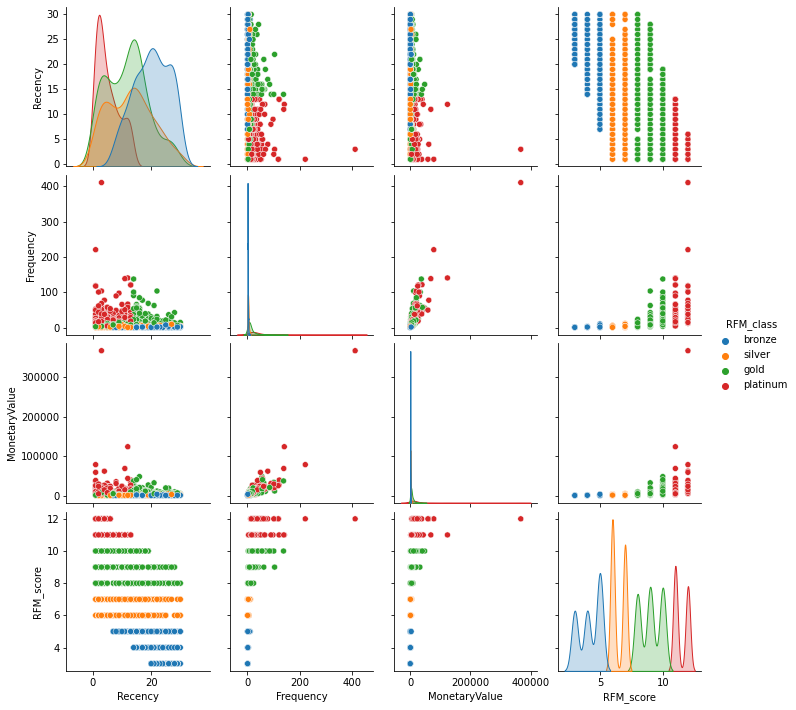

In [161]:
# pairplot 을 통해 "RFM_class" 별로 분포를 시각화 합니다.
sns.pairplot(data=rfm.sample(1000), hue="RFM_class")

In [166]:
# .corr() 함수로 변수간 상관관계(선형적 관계)를 분석합니다.
# 1에 가까울 수록 양의 상관관계, -1에 가까울 수록 음의 상관관계를 나타냅니다.
rfm_corr = rfm.corr()
rfm_corr.style.background_gradient(cmap = "Greens")

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.184571,-0.159742,-0.603384
Frequency,-0.184571,1.000000,0.834075,0.465772
MonetaryValue,-0.159742,0.834075,1.000000,0.418225
RFM_score,-0.603384,0.465772,0.418225,1.000000


<AxesSubplot:>

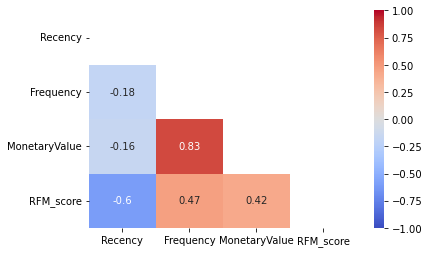

In [167]:
# 삼각형태의 heatmap 형태를 만들기 위해 삼각형 마스크를 만듭니다.
mask = np.triu(np.ones_like(rfm_corr))
sns.heatmap(data = rfm_corr,mask = mask, cmap = "coolwarm", vmax = 1, vmin = -1, annot = True)

In [169]:
# RFM 분석 자료를 csv 로 저장합니다.
rfm.to_parquet("rfm_ec.zip", compression = "gzip")

In [171]:
# 저장된 csv 형태의 RFM 분석 자료를 읽어옵니다. 
rfm_ec = pd.read_parquet("rfm_ec.zip" )

In [172]:
rfm_ec

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
user_id,,,,,,,,,
29515875,19,5,691.09,2,3,2,232,7,silver
31198833,18,18,5780.68,2,4,4,244,10,gold
41798457,5,1,945.97,4,1,2,412,7,silver
74383042,12,11,1280.58,3,3,2,332,8,gold
88309646,20,1,123.07,1,1,1,111,3,bronze
...,...,...,...,...,...,...,...,...,...
579969525,1,1,591.75,4,1,2,412,7,silver
579969533,1,1,152.72,4,1,1,411,6,silver
579969570,1,3,752.61,4,2,2,422,8,gold


In [173]:
rfm_ec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2199457 entries, 29515875 to 579969851
Data columns (total 9 columns):
 #   Column         Dtype   
---  ------         -----   
 0   Recency        int64   
 1   Frequency      int64   
 2   MonetaryValue  float32 
 3   R              int64   
 4   F              int64   
 5   M              int64   
 6   RFM_segment    object  
 7   RFM_score      int64   
 8   RFM_class      category
dtypes: category(1), float32(1), int64(6), object(1)
memory usage: 144.7+ MB
